# <span style="color:black"> LSN-Esercitazione numerica 12</span>

## <span style="color:blue">  Esercizio 12.1</span>

Ho scritto una funzione che riconsocessce la cifre scritte nel *MNIST dataset* attraverso l'allenamento di una **Deep Neural Network** con diverse diversi ottimizzatori.
La funzione stampa la funzioni costo e accuratezza, mostrandone l'andamento di test e di allenamento all'aumentare delle epoche e mostra con le cifre scritte e stimate.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)
from keras.datasets import mnist
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [4]:
def Numbers(opt):
    # input image dimensions
    img_rows, img_cols = 28, 28 # number of pixels 
    # output
    num_classes = 10 # 10 digits

    # the data, split between train and test sets
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    
    # reshape data, it could depend on Keras backend
    X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

    # cast floats to single precesion
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # rescale data in interval [0,1]
    X_train /= 255
    X_test /= 255

    # convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
    Y_train = keras.utils.to_categorical(Y_train, num_classes)
    Y_test = keras.utils.to_categorical(Y_test, num_classes)
    
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt(),
                  metrics=['accuracy'])
    
    batch_size = 32
    epochs = 5

    # train DNN and store training info in history
    history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
    
    # evaluate model
    score = model.evaluate(X_test, Y_test, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # look into training history

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    
    #X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    predictions = model.predict(X_test)

    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:  {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()

## SGD

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.7585 - accuracy: 0.7787 - val_loss: 0.3096 - val_accuracy: 0.9112
Epoch 2/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.3815 - accuracy: 0.8920 - val_loss: 0.2393 - val_accuracy: 0.9292
Epoch 3/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.3092 - accuracy: 0.9128 - val_loss: 0.2016 - val_accuracy: 0.9399
Epoch 4/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.2647 - accuracy: 0.9259 - val_loss: 0.1787 - val_accuracy: 0.9475
Epoch 5/5
10000/10000 [==============================] - 1s 54us/step

Test loss: 0.1570996163137257
Test accuracy: 0.9521999955177307


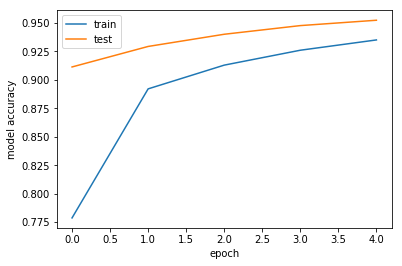

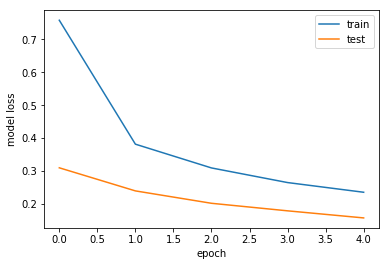

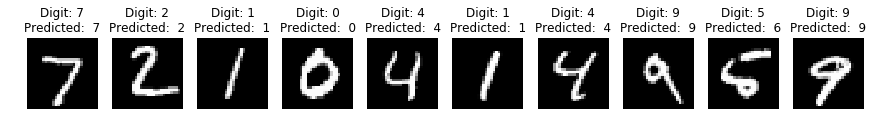

In [5]:
Numbers(SGD)

#### SGD: 9 corretti su 10

## ADAM

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 290us/step - loss: 0.2888 - accuracy: 0.9146 - val_loss: 0.1110 - val_accuracy: 0.9675
Epoch 2/5
60000/60000 [==============================] - 18s 293us/step - loss: 0.1235 - accuracy: 0.9643 - val_loss: 0.0893 - val_accuracy: 0.9720
Epoch 3/5
60000/60000 [==============================] - 18s 295us/step - loss: 0.0896 - accuracy: 0.9740 - val_loss: 0.0771 - val_accuracy: 0.9771
Epoch 4/5
60000/60000 [==============================] - 18s 294us/step - loss: 0.0684 - accuracy: 0.9797 - val_loss: 0.0845 - val_accuracy: 0.9751
Epoch 5/5
10000/10000 [==============================] - 0s 37us/step

Test loss: 0.07501660514251998
Test accuracy: 0.9793999791145325


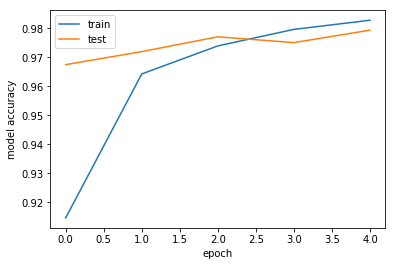

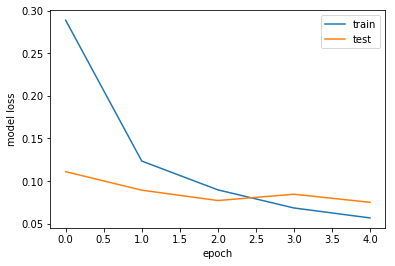

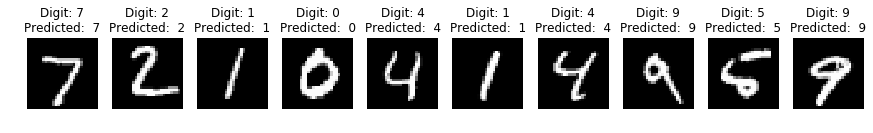

In [6]:
Numbers(Adam)

#### ADAM: 10 corretti su 10

## Adadelta

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 497us/step - loss: 0.2863 - accuracy: 0.9160 - val_loss: 0.1159 - val_accuracy: 0.9653
Epoch 2/5
60000/60000 [==============================] - 25s 421us/step - loss: 0.1263 - accuracy: 0.9642 - val_loss: 0.0912 - val_accuracy: 0.9740
Epoch 3/5
60000/60000 [==============================] - 24s 397us/step - loss: 0.0926 - accuracy: 0.9740 - val_loss: 0.0819 - val_accuracy: 0.9760
Epoch 4/5
60000/60000 [==============================] - 29s 479us/step - loss: 0.0749 - accuracy: 0.9789 - val_loss: 0.0814 - val_accuracy: 0.9781
Epoch 5/5
10000/10000 [==============================] - 1s 72us/step

Test loss: 0.08015602109286847
Test accuracy: 0.9785000085830688


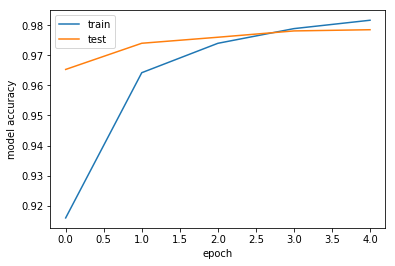

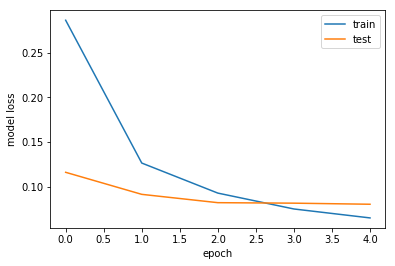

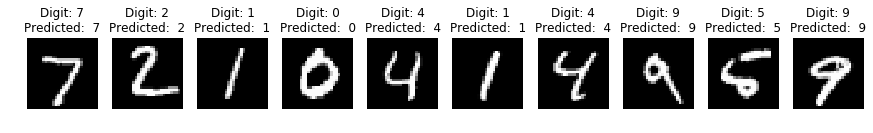

In [7]:
Numbers(Adadelta)

#### Adadelta: 10 corretti su 10

## <span style="color:blue">  Esercizio 12.2</span>

Ho costruito una **Convolutional Neural Network** così composta:
* Layer 1: operazione di **convoluzione 2D** con 6 filtri di dimensione 5x5, con funzione di attivazione *relu*
* **Polling** con filtro 2x2
* **Dropout** con rate 0.5
* Layer 2: operazione di **convoluzione 2D** con 16 filtri di dimensione 5x5, con funzione di attivazione *relu*
* **Polling** con filtro 2x2
* **Flatten**
* **Dropout** con rate 0.5
* Layer 3: **layer denso** (complemente connesso) di dimesione 256 con funzione di attivazione *relu*
* Layer 4: **layer denso** di dimesioni 10 con funzione di attivazione ***softmax*** per descrivere le probabilità associata ad ogni cifra

In [15]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10 # 10 digits
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

In [16]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [17]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 442us/step - loss: 1.1278 - accuracy: 0.6087 - val_loss: 0.2897 - val_accuracy: 0.9266
Epoch 2/5
60000/60000 [==============================] - 21s 347us/step - loss: 0.4342 - accuracy: 0.8622 - val_loss: 0.1691 - val_accuracy: 0.9511
Epoch 3/5
60000/60000 [==============================] - 22s 363us/step - loss: 0.3401 - accuracy: 0.8934 - val_loss: 0.1411 - val_accuracy: 0.9574
Epoch 4/5
60000/60000 [==============================] - 23s 386us/step - loss: 0.2931 - accuracy: 0.9076 - val_loss: 0.1182 - val_accuracy: 0.9662
Epoch 5/5
10000/10000 [==============================] - 1s 119us/step

Test loss: 0.10811926266998052
Test accuracy: 0.9689000248908997


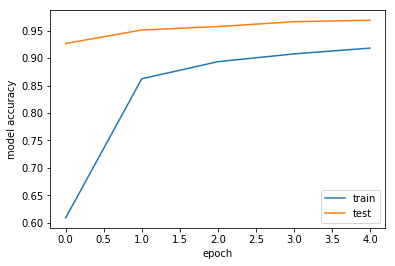

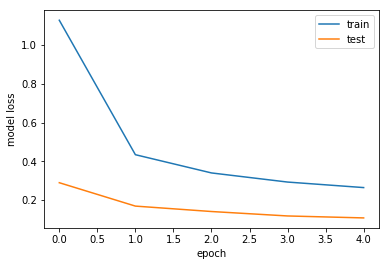

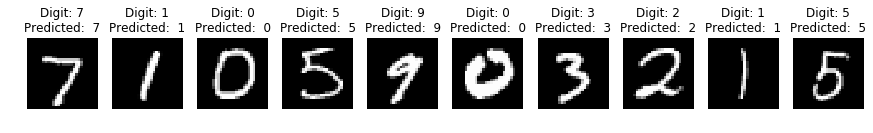

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
    
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i*5, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:  {}".format(np.argmax(Y_test[i*5]), np.argmax(predictions[i*5])))    
    plt.axis('off') 
plt.show()

#### CNN: 10 corretti su 10!

## <span style="color:blue">  Esercizio 13.3</span>

Testo la rete neurale convoluzionale con delle cifre scritte a mano da me.

In [19]:
from PIL import Image
import os

In [20]:
digit_filename=list()
digit_in=list()

for i in range(10):
    digit_filename.append("./digits/digit"+str(i)+".png")
    digit_in.append(Image.open(digit_filename[i]).convert('L'))
    
num=0

ydim, xdim = digit_in[num+1].size
#print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in[num+1].load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255


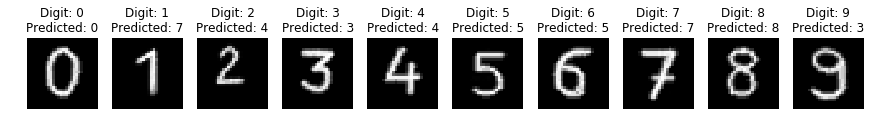

In [21]:
data = data.reshape(xdim, ydim)

plt.figure(figsize=(15, 15)) 
for k in range(10):    

    ydim, xdim = digit_in[k].size
    pix=digit_in[k].load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(1, 1, img_rows, img_cols)
        data = data.reshape(1, 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(1, img_rows, img_cols, 1)
        data = data.reshape(1, img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)
    
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(data, cmap='gray')  
    plt.title("Digit: {}\nPredicted: {}".format(k, np.argmax(pred_0)))    
    plt.axis('off') 
plt.show()

#### 6 corrette su 10!

La rete neuronale convoluzionale con un allenamento di poco più di un minuto riconosce tutte 10 cifre su 10 del datset MNIST e 6 delle 10 cifre scritte a mano con calligrafia diversa.